## Learning to build my things

# Ideal Data

In [1]:
import pandas as pd

In [2]:
Data_path=r"C:\Users\Vinayak Mani Tripath\OneDrive\Desktop\CODING\MachineLearning\MACHINELEARNING\data\Benign-Monday-no-metadata.parquet"
df=pd.read_parquet(Data_path)
df.shape


(458831, 78)

In [3]:
df.shape, df.columns.size



((458831, 78), 78)

### Data Cleaning

#### Removing negative flow duration 

In [4]:
before=df.shape[0]
df=df[df['Flow Duration']>=0]
after=df.shape[0]
before,after,before-after

(458831, 458816, 15)

## Missing values check

In [5]:
df.isna().sum().sort_values(ascending=False).head(10)

Protocol                    0
Flow Duration               0
Total Fwd Packets           0
Total Backward Packets      0
Fwd Packets Length Total    0
Bwd Packets Length Total    0
Fwd Packet Length Max       0
Fwd Packet Length Min       0
Fwd Packet Length Mean      0
Fwd Packet Length Std       0
dtype: int64

In [6]:
df.fillna(0)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Fwd Packets Length Total,Bwd Packets Length Total,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,6,4,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
1,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
2,6,3,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
3,6,1,2,0,12,0,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
4,6,609,7,4,484,414,233,0,69.14286,111.967896,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458826,6,18738,1,1,6,6,6,6,6.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign
458827,17,60797,2,2,80,156,40,40,40.00000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
458828,17,154,2,2,64,96,32,32,32.00000,0.000000,...,32,0.0,0.0,0,0,0.0,0.0,0,0,Benign
458829,17,155,2,2,80,144,40,40,40.00000,0.000000,...,20,0.0,0.0,0,0,0.0,0.0,0,0,Benign


## Feature Selection

In [7]:
FEATURES = [
    'Protocol',
    'Flow Duration',
    'Total Fwd Packets',
    'Total Backward Packets',
    'Fwd Packets Length Total',
    'Bwd Packets Length Total',
    'Fwd Packet Length Mean',
    'Fwd Packet Length Std',
    'Bwd Packet Length Mean',
    'Bwd Packet Length Std',
    'Flow Packets/s',
    'Flow Bytes/s',
    'SYN Flag Count',
    'ACK Flag Count',
    'RST Flag Count',
    'FIN Flag Count',
]


In [8]:
X_benign = df[FEATURES]
X_benign.shape


(458816, 16)

In [9]:
df[FEATURES].corr().abs().mean().sort_values(ascending=False)


Fwd Packets Length Total    0.286370
Bwd Packet Length Std       0.261417
Total Fwd Packets           0.248042
Total Backward Packets      0.247780
Bwd Packets Length Total    0.246924
Fwd Packet Length Std       0.242626
Bwd Packet Length Mean      0.232624
Protocol                    0.214810
ACK Flag Count              0.209668
Fwd Packet Length Mean      0.202233
Flow Duration               0.175457
Flow Packets/s              0.139114
SYN Flag Count              0.131084
Flow Bytes/s                0.100382
FIN Flag Count              0.091877
RST Flag Count              0.070305
dtype: float64

In [10]:
X_benign.describe().T[['mean','std','min','max']].head()



,mean,std,min,max
Protocol,1.103322e+01,5.486427e+00,0.0,17.0
Flow Duration,1.197019e+07,3.056880e+07,1.0,119999987.0
Total Fwd Packets,1.171471e+01,9.590644e+02,1.0,219759.0
Total Backward Packets,1.319646e+01,1.260951e+03,0.0,291922.0
Fwd Packets Length Total,6.083102e+02,6.690352e+03,0.0,1323378.0


# Attack data

In [11]:
Attack_path=r"C:\Users\Vinayak Mani Tripath\OneDrive\Desktop\CODING\MachineLearning\MACHINELEARNING\data\DoS-Wednesday-no-metadata.parquet"
df_dos=pd.read_parquet(Attack_path)
df_dos.shape,df_dos['Label'].value_counts()

((584991, 78),
 Label
 Benign              391235
 DoS Hulk            172846
 DoS GoldenEye        10286
 DoS slowloris         5385
 DoS Slowhttptest      5228
 Heartbleed              11
 Name: count, dtype: int64)

In [12]:
df_dos=df_dos[df_dos['Flow Duration']>=0].fillna(0)
x_dos=df_dos[FEATURES]

### PREPARE FOR ML(ANOMLY FIRST)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xb_scaled=scaler.fit_transform(X_benign)
xd_scaled=scaler.transform(x_dos)

## Model Selection

In [14]:
from sklearn.ensemble import IsolationForest

### Model Initialisation

In [15]:
iso=IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)

## Model training

In [16]:
iso.fit(xb_scaled)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",200
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [17]:
pred_benign=iso.predict(xb_scaled)

In [18]:
import numpy as np

np.unique(pred_benign, return_counts=True)


(array([-1,  1]), array([ 22941, 435875]))

## Prediction

In [19]:
pred_dos=iso.predict(xd_scaled)
np.unique(pred_dos,return_counts=True)

(array([-1,  1]), array([172336, 412634]))

In [20]:
anomaly_ratio = (pred_dos == -1).mean()
anomaly_ratio


np.float64(0.29460656102022326)

In [21]:
benign_anomaly_ratio = (pred_benign == -1).mean()

benign_anomaly_ratio, anomaly_ratio


(np.float64(0.050000435904589205), np.float64(0.29460656102022326))

Attack anomly sirf 29% aayi to esko improve krne ke liye hm contamination badhayenge 

In [22]:
iso2=IsolationForest(
    n_estimators=300,
    contamination=0.15,
    random_state=42,
    n_jobs=-1)



In [23]:
iso2.fit(xb_scaled)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",300
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.15
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [24]:
pred_dos2=iso2.predict(xd_scaled)
(pred_dos2 ==-1).mean()

np.float64(0.41007060191120914)

## now the attac anomaly is 41% , to increase more add attack-focused features

In [25]:
df['packet_ratio']=(df['Total Fwd Packets'])/(df['Total Backward Packets']+1)
df_dos['packet_ratio']=(df_dos['Total Fwd Packets'])/(df_dos['Total Backward Packets']+1
                                                     )
                                    

In [26]:
FEATURES.append('packet_ratio')

In [27]:
df['syn_ratio']=(df['SYN Flag Count'])/(df['ACK Flag Count']+1)
df_dos['syn_ratio']=(df_dos['SYN Flag Count']/(df_dos['ACK Flag Count']+1))

In [28]:
FEATURES.append('syn_ratio')

### REscale and Retrain

In [29]:
xb_scaled=scaler.fit_transform(df[FEATURES])

In [30]:
xd_scaled=scaler.fit_transform(df_dos[FEATURES])

In [31]:
iso3=IsolationForest(
    n_estimators=300,
    contamination=0.05,
    random_state=42,
    n_jobs=-1)

In [32]:
iso3.fit(xb_scaled)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",300
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [33]:
(pred_dos3 :=iso3.predict(xd_scaled) ==-1).mean()

np.float64(0.05293946698121271)

In [34]:
benign_ratio = (iso3.predict(xb_scaled) == -1).mean()
dos_ratio = (iso3.predict(xd_scaled) == -1).mean()

benign_ratio, dos_ratio


(np.float64(0.04997428162923699), np.float64(0.05293946698121271))

In [35]:
iso_fix=IsolationForest(
    n_estimators=300,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)
iso_fix.fit(xb_scaled)

,"n_estimators n_estimators: int, default=100The number of base estimators in the ensemble.",300
,"max_samples max_samples: ""auto"", int or float, default=""auto""The number of samples to draw from X to train each base estimator.- If int, then draw `max_samples` samples.- If float, then draw `max_samples * X.shape[0]` samples.- If ""auto"", then `max_samples=min(256, n_samples)`.If max_samples is larger than the number of samples provided,all samples will be used for all trees (no sampling).",'auto'
,"contamination contamination: 'auto' or float, default='auto'The amount of contamination of the data set, i.e. the proportionof outliers in the data set. Used when fitting to define the thresholdon the scores of the samples.- If 'auto', the threshold is determined as in the original paper.- If float, the contamination should be in the range (0, 0.5]... versionchanged:: 0.22 The default value of ``contamination`` changed from 0.1 to ``'auto'``.",0.05
,"max_features max_features: int or float, default=1.0The number of features to draw from X to train each base estimator.- If int, then draw `max_features` features.- If float, then draw `max(1, int(max_features * n_features_in_))` features.Note: using a float number less than 1.0 or integer less than number offeatures will enable feature subsampling and leads to a longer runtime.",1.0
,"bootstrap bootstrap: bool, default=FalseIf True, individual trees are fit on random subsets of the trainingdata sampled with replacement. If False, sampling without replacementis performed.",False
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for :meth:`fit`. ``None`` means 1unless in a :obj:`joblib.parallel_backend` context. ``-1`` means usingall processors. See :term:`Glossary ` for more details.",-1
,"random_state random_state: int, RandomState instance or None, default=NoneControls the pseudo-randomness of the selection of the featureand split values for each branching step and each tree in the forest.Pass an int for reproducible results across multiple function calls.See :term:`Glossary `.",42
,"verbose verbose: int, default=0Controls the verbosity of the tree building process.",0
,"warm_start warm_start: bool, default=FalseWhen set to ``True``, reuse the solution of the previous call to fitand add more estimators to the ensemble, otherwise, just fit a wholenew forest. See :term:`the Glossary `... versionadded:: 0.21",False


In [36]:
scores_benign = iso_fix.decision_function(xb_scaled)
scores_dos = iso_fix.decision_function(xd_scaled)
print(scores_benign)
print(scores_dos)

[ 0.07479179 -0.0136933   0.05186806 ...  0.17663872  0.17504455
  0.16587638]
[0.16394148 0.10708081 0.0194638  ... 0.01501785 0.14434649 0.15953024]


In [37]:
# pip install matplolib

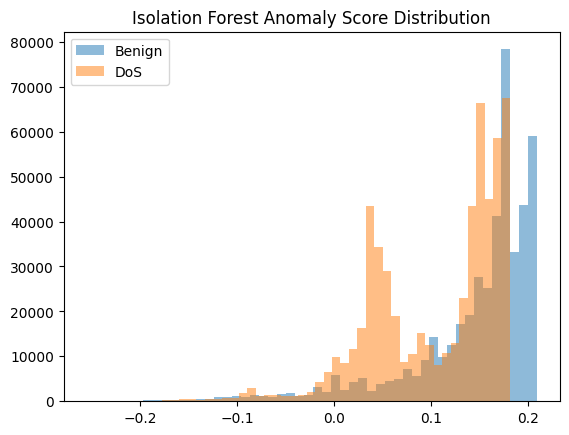

In [38]:
import matplotlib.pyplot as plt

plt.hist(scores_benign, bins=50, alpha=0.5, label="Benign")
plt.hist(scores_dos, bins=50, alpha=0.5, label="DoS")
plt.legend()
plt.title("Isolation Forest Anomaly Score Distribution")
plt.show()


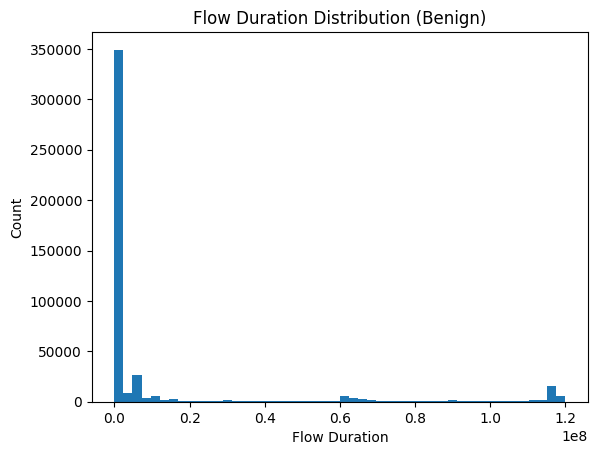

In [39]:
plt.hist(df['Flow Duration'], bins=50)
plt.title("Flow Duration Distribution (Benign)")
plt.xlabel("Flow Duration")
plt.ylabel("Count")
plt.show()


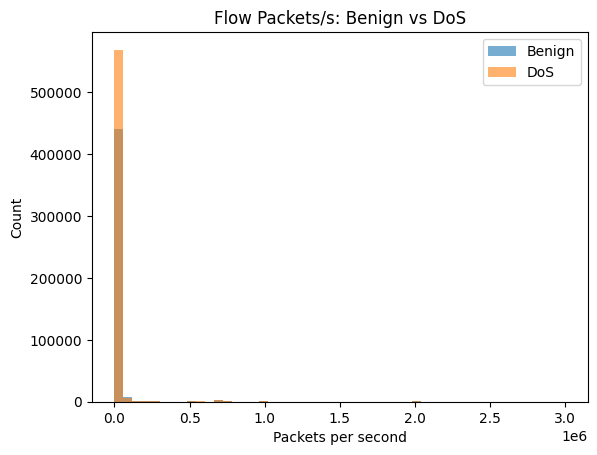

In [40]:
plt.hist(df['Flow Packets/s'], bins=50, alpha=0.6, label="Benign")
plt.hist(df_dos['Flow Packets/s'], bins=50, alpha=0.6, label="DoS")

plt.legend()
plt.title("Flow Packets/s: Benign vs DoS")
plt.xlabel("Packets per second")
plt.ylabel("Count")
plt.show()



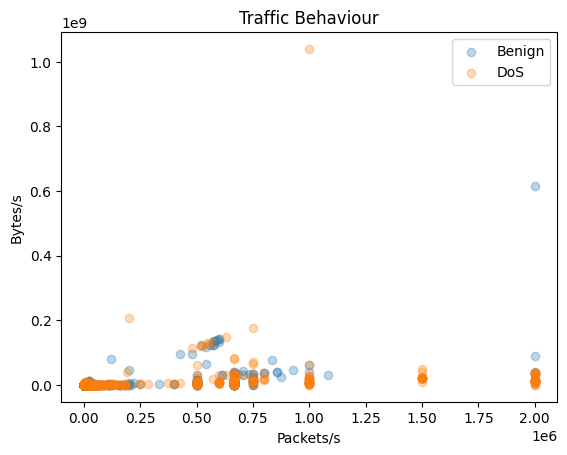

In [41]:
plt.scatter(
    df['Flow Packets/s'][:3000],
    df['Flow Bytes/s'][:3000],
    alpha=0.3,
    label="Benign"
)

plt.scatter(
    df_dos['Flow Packets/s'][:3000],
    df_dos['Flow Bytes/s'][:3000],
    alpha=0.3,
    label="DoS"
)

plt.legend()
plt.xlabel("Packets/s")
plt.ylabel("Bytes/s")
plt.title("Traffic Behaviour")
plt.show()


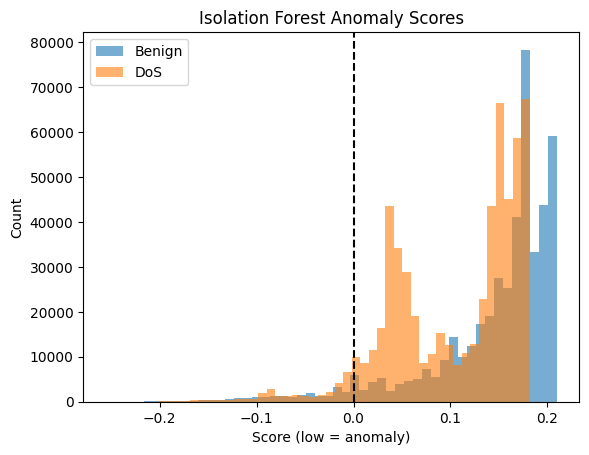

In [42]:
plt.hist(scores_benign, bins=50, alpha=0.6, label="Benign")
plt.hist(scores_dos, bins=50, alpha=0.6, label="DoS")

plt.axvline(0, color='black', linestyle='--')
plt.legend()
plt.title("Isolation Forest Anomaly Scores")
plt.xlabel("Score (low = anomaly)")
plt.ylabel("Count")
plt.show()


#### Isolation Forest fails on this dataset because DoS traffic is not rare or isolated. Its anomaly score distribution heavily overlaps with benign traffic, indicating that DoS flows are behaviorally dense rather than outliers.

In [43]:
import numpy as np

In [44]:
x_b=df[FEATURES].copy()
x_d=df_dos[FEATURES].copy()
y_b=np.zeros(len(x_b))
y_d=np.ones(len(x_d))
x=pd.concat([x_b,x_d],axis=0)
y=np.concatenate([y_b, y_d])

In [45]:
x.shape,y.shape

((1043786, 18), (1043786,))

### Trianing testing 

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(
x,y,test_size=0.2,random_state=42,stratify=y)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(
 n_estimators=300,
    max_depth=None,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)
rf.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [48]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred=rf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred,target_names=["Benign","DoS"]))

[[63563 28201]
 [36811 80183]]
              precision    recall  f1-score   support

      Benign       0.63      0.69      0.66     91764
         DoS       0.74      0.69      0.71    116994

    accuracy                           0.69    208758
   macro avg       0.69      0.69      0.69    208758
weighted avg       0.69      0.69      0.69    208758



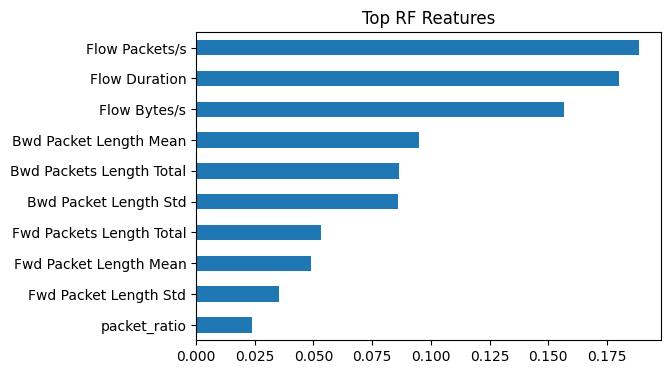

In [49]:
imp=pd.Series(rf.feature_importances_,index=FEATURES).sort_values()

plt.figure(figsize=(6,4))
imp.tail(10).plot(kind="barh",title="Top RF Reatures")
plt.show()

In [51]:
y_prob = rf.predict_proba(x_test)[:,1]


In [52]:
y_prob

array([1.        , 0.59      , 0.8584685 , ..., 0.89333333, 0.66      ,
       0.76315741], shape=(208758,))

In [53]:
threshold = 0.3
y_pred_custom=(y_prob>threshold).astype(int)

In [57]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred_custom))
print(classification_report(y_test,y_pred_custom))

[[ 38635  53129]
 [ 14790 102204]]
              precision    recall  f1-score   support

         0.0       0.72      0.42      0.53     91764
         1.0       0.66      0.87      0.75    116994

    accuracy                           0.67    208758
   macro avg       0.69      0.65      0.64    208758
weighted avg       0.69      0.67      0.65    208758



In [59]:
cm=confusion_matrix(y_test,y_pred_custom)
fn=cm[1][0]
print("Missed Attack (fn):",fn)


Missed Attack (fn): 14790


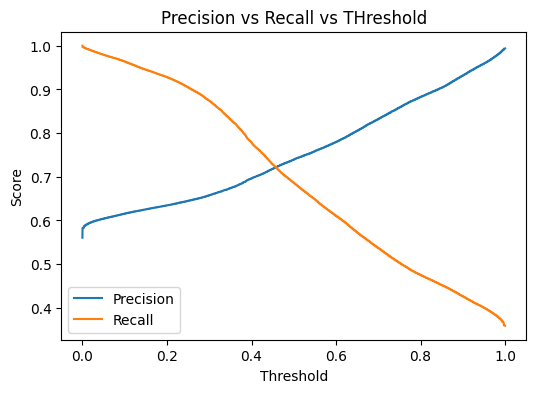

In [64]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_prob)
plt.figure(figsize=(6,4))
plt.plot(thresholds,precision[:-1],label="Precision")
plt.plot(thresholds,recall[:-1],label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.title("Precision vs Recall vs THreshold")
plt.show()




In [65]:
f1_scores=2*(precision*recall)/(precision+recall+1e-10)
best_idx=f1_scores.argmax()
best_threshold=thresholds[best_idx]
best_threshold

np.float64(0.22961295835672588)

In [66]:
y_pred_best=(y_prob>best_threshold).astype(int)
print(confusion_matrix(y_test,y_pred_best))
print(classification_report(y_test,y_pred_best))

[[ 31602  60162]
 [  9833 107161]]
              precision    recall  f1-score   support

         0.0       0.76      0.34      0.47     91764
         1.0       0.64      0.92      0.75    116994

    accuracy                           0.66    208758
   macro avg       0.70      0.63      0.61    208758
weighted avg       0.69      0.66      0.63    208758



In [70]:
for t in[0.25,0.3,0.35,0.4,0.45,0.5]:
    y_pred_trail=(y_prob>t).astype(int)
    cm=confusion_matrix(y_test,y_pred_trail)
    tn,fp,fn,tp=cm.ravel()
    print(f"\nThreshold {t}")
    print("FP :",fp)
    print("FN :",fn)


Threshold 0.25
FP : 58161
FN : 11229

Threshold 0.3
FP : 53129
FN : 14790

Threshold 0.35
FP : 46937
FN : 19802

Threshold 0.4
FP : 39701
FN : 25949

Threshold 0.45
FP : 33338
FN : 31841

Threshold 0.5
FP : 28201
FN : 36811


#### now we find the perfect threshold for detection which is o.4

best_threshold=0.4;
y_pred_final=(y_prob>best_threshold).astype(int)
print(confusion_matrix(y_test,y_pred_final))
print(classification_report(y_test,y_pred_final))

#### Threshold tuning shows tradeoff between false alarms and missed attacks.
Threshold = 0.4 provides balanced IDS behavior with manageable false positives
and significantly lower missed attacks than default RF.


## ROC CURVE

### Model attack aur benign ko kitna achha separate karta hai
True Positive Rate (Recall)
vs
False Positive Rate


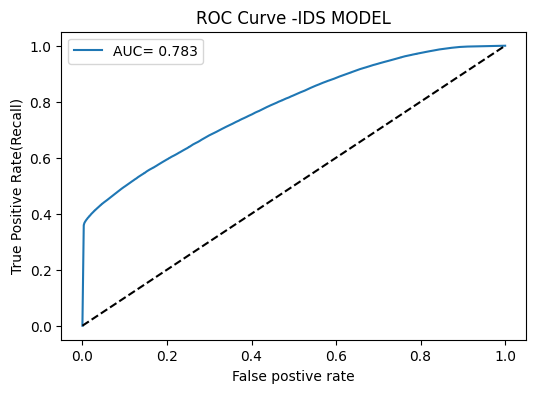

AUC SCORE:  0.7830356298029841


In [76]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f"AUC= {roc_auc :.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False postive rate")
plt.ylabel("True Positive Rate(Recall)")
plt.title("ROC Curve -IDS MODEL")
plt.legend()
plt.show()
print("AUC SCORE: ",roc_auc)


# Feature Engineering

## FEATURE 1 — Byte per packet behaviour

In [79]:
df["bytes_per_packet"]=df["Flow Bytes/s"]/(df["Flow Packets/s"]+1)
df_dos["bytes_per_packet"]=df_dos["Flow Bytes/s"]/(df_dos["Flow Packets/s"]+1)

## FEATURE 2 — Log packet rate (burst detection)

In [80]:
df["packet_rate_log"]=np.log1p(df["Flow Packets/s"])
df_dos["packet_rate_log"]=np.log1p(df["Flow Packets/s"])

## FEATURE 3 — Duration vs rate behaviour

In [81]:
df["rate_duration_ratio"] = df["Flow Duration"]/(df["Flow Packets/s"]+1)
df_dos["rate_duration_ratio"] = df_dos["Flow Duration"]/(df_dos["Flow Packets/s"]+1)


### Updating feature list

In [82]:
FEATURES = FEATURES + [
    "bytes_per_packet",
    "packet_rate_log",
    "rate_duration_ratio"
]


In [85]:
rf_cost=RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1,
    class_weight={0:1,1:3} #attack -> 3X importance
)
rf_cost.fit(x_train,y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [90]:
y_prob=rf_cost.predict_proba(x_test)[:,1]
threshold=0.4
y_pred_cost=(y_prob > threshold).astype(int)
print(confusion_matrix(y_test,y_pred_cost))
print(classification_report(y_test,y_pred_cost))

[[45861 45903]
 [20895 96099]]
              precision    recall  f1-score   support

         0.0       0.69      0.50      0.58     91764
         1.0       0.68      0.82      0.74    116994

    accuracy                           0.68    208758
   macro avg       0.68      0.66      0.66    208758
weighted avg       0.68      0.68      0.67    208758



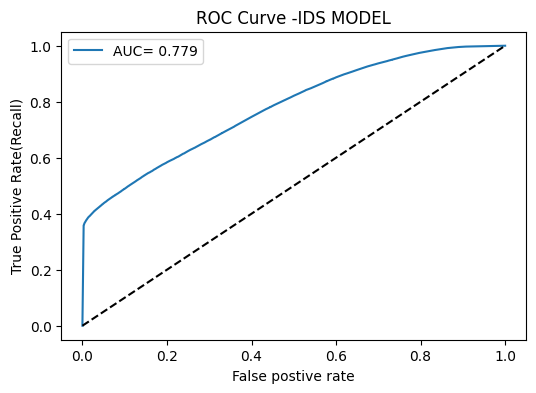

AUC SCORE:  0.7789005905619986


In [93]:
fpr,tpr,thresholds=roc_curve(y_test,y_prob)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,label=f"AUC= {roc_auc :.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False postive rate")
plt.ylabel("True Positive Rate(Recall)")
plt.title("ROC Curve -IDS MODEL")
plt.legend()
plt.show()
print("AUC SCORE: ",roc_auc)